In [1]:
# Import the dependencies
import numpy as np
np.random.seed(0)
import pandas as pd
from sklearn import datasets

### Build the Dataset

In [2]:
# Create a simulated dataset for illustration.
X, y = datasets.make_moons(n_samples=(500), noise=0.05, random_state=1)
X[0:10]

array([[ 0.26990344, -0.08961617],
       [ 0.65960878, -0.44401893],
       [ 0.85049952,  0.56270289],
       [ 0.60950684,  0.69134729],
       [ 2.00353027,  0.19446353],
       [ 1.98790193,  0.40053406],
       [ 0.24847592, -0.18050231],
       [ 0.94871933,  0.37843451],
       [-0.96065183, -0.10227327],
       [ 0.44418573,  0.90246804]])

### Fit and predict a K-Means Model

In [3]:
# Import the alternative algorithms for clustering.
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
# Use the Kmeans algorithm.
k_model = KMeans(n_clusters=3, n_init='auto', random_state=0)
k_model.fit(X)
predictions = k_model.predict(X)

<Axes: xlabel='feature_0', ylabel='feature_1'>

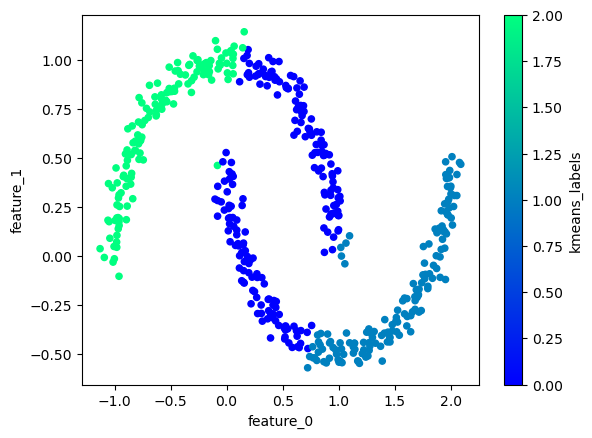

In [5]:
# Plot the clusters
predictions_df = pd.DataFrame(X)
predictions_df['kmeans_labels'] = predictions
predictions_df.rename({0: 'feature_0', 1: 'feature_1'}, axis=1, inplace=True)
# Plot the clusters
predictions_df.plot.scatter(
    x="feature_0",
    y="feature_1",
    c="kmeans_labels",
    colormap="winter")

### Fit and Predict Birch and Agglomerative models

In [13]:
# Use the Birch algorithm.
birch_model = Birch(n_clusters=2)
birch_model.fit(X)
birch_predictions = birch_model.predict(X)

<Axes: xlabel='feature_0', ylabel='feature_1'>

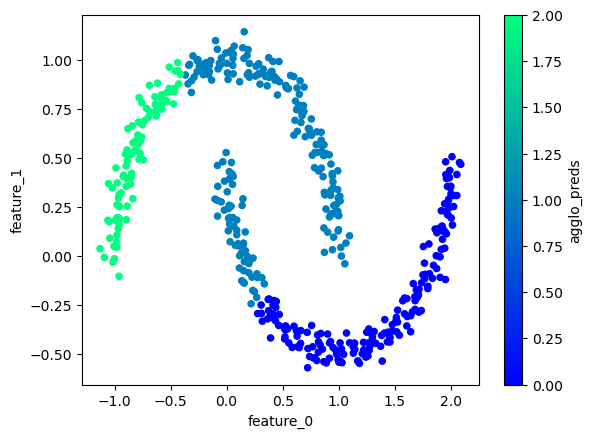

In [14]:
# Use the AgglomerativeClustering algorithm.
agglo_model = AgglomerativeClustering(n_clusters=3)
agglo_predictions = agglo_model.fit_predict(X)

predictions_df['agglo_preds'] = agglo_predictions

predictions_df.plot.scatter(
    x="feature_0",
    y="feature_1",
    c="agglo_preds",
    colormap="winter")

### Plot Model Predictions for Birch

In [16]:
# # Make predictions for the Birch algorithm. 
predictions_df['birch-labels'] = birch_predictions
predictions_df

,feature_0,feature_1,kmeans_labels,agglo_preds,birch-labels
0,0.269903,-0.089616,0,1,0
1,0.659609,-0.444019,0,0,0
2,0.850500,0.562703,0,1,0
3,0.609507,0.691347,0,1,0
4,2.003530,0.194464,1,0,0
...,...,...,...,...,...
495,0.024589,0.392571,0,1,1
496,0.673013,0.715418,0,1,0
497,1.277861,-0.457502,1,0,0
498,-0.980544,0.194562,2,2,1


In [17]:
# #  Rename the non-string columns 0 and 1, "No" and "Yes" to avoid the Holoviews warning for future versions. 
# # predictions_df.rename({0: 'feature_0', 1: 'feature_1'}, axis=1, inplace=True)
# predictions_df

<Axes: xlabel='feature_0', ylabel='feature_1'>

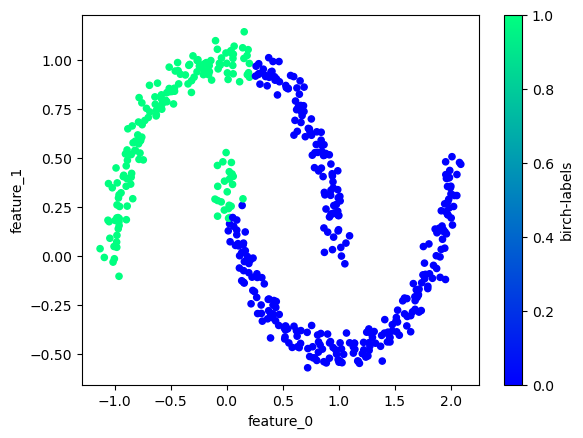

In [18]:
# Plot the clusters
predictions_df.plot.scatter(
    x="feature_0",
    y="feature_1",
    c="birch-labels",
    colormap="winter")

### Estimate Scores for two Versions of the Birch Model

In [19]:
# Estimate scores for two clusters for the Birch model. 
birch_model_no_clusters = Birch()
birch_model_no_clusters.fit(X)
birch_predictions_none = birch_model_no_clusters.predict(X)

predictions_df['birch-labels_none'] = birch_predictions_none

In [20]:
# Use the Calinski-Harabasz index or variance ratio criterion to define two clusters. 
from sklearn import metrics
labels = birch_model_no_clusters.labels_
score = metrics.calinski_harabasz_score(X, labels)  
score

654.2904571777167

<Axes: xlabel='feature_0', ylabel='feature_1'>

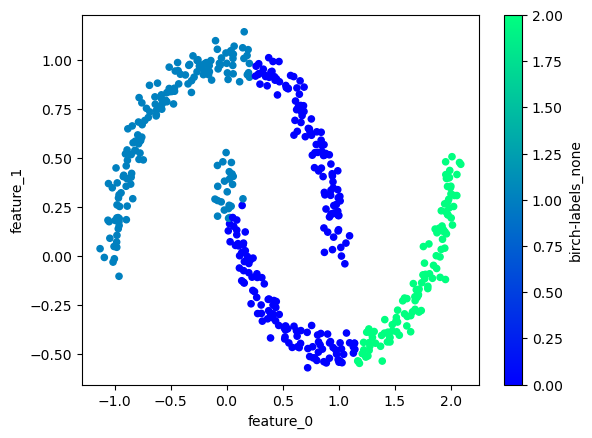

In [21]:
# Plot the clusters
predictions_df.plot.scatter(
    x="feature_0",
    y="feature_1",
    c="birch-labels_none",
    colormap="winter")

In [22]:
# Estimate scores for two clusters for the Birch model. 
birch_model_two_clusters = Birch(n_clusters=2)
birch_model_two_clusters.fit(X)
birch_predictions_2 = birch_model_two_clusters.predict(X)

predictions_df['birch-labels2'] = birch_predictions_2

In [23]:
# Use the Calinski-Harabasz index or variance ratio criterion to define two clusters. 
from sklearn import metrics
labels = birch_model_two_clusters.labels_
score = metrics.calinski_harabasz_score(X, labels)  
score

588.1123857523019

In [24]:
# Estimate scores for 3 clusters for the Birch model. 
birch_model_three_clusters = Birch(n_clusters=3)
birch_model_three_clusters.fit(X)
birch_predictions_3 = birch_model_three_clusters.predict(X)

predictions_df['birch-labels3'] = birch_predictions_3

<Axes: xlabel='feature_0', ylabel='feature_1'>

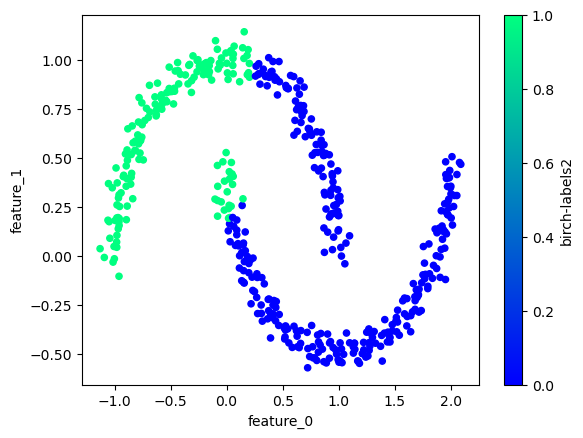

In [25]:
# Plot the clusters
predictions_df.plot.scatter(
    x="feature_0",
    y="feature_1",
    c="birch-labels2",
    colormap="winter")

In [26]:
# Use the Calinski-Harabasz index or variance ratio criterion to define three clusters. 
labels = birch_model_three_clusters.labels_
score = metrics.calinski_harabasz_score(X, labels)  
score

654.2904571777167

<Axes: xlabel='feature_0', ylabel='feature_1'>

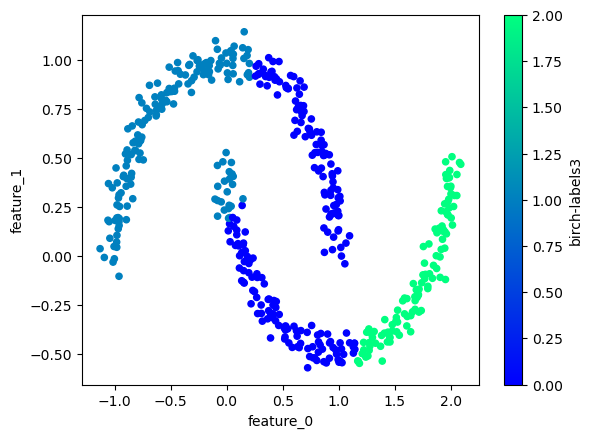

In [27]:
# Plot the clusters
predictions_df.plot.scatter(
    x="feature_0",
    y="feature_1",
    c="birch-labels3",
    colormap="winter")